In [37]:
%config IPCompleter.greedy=True


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', 100)
sns.set()


In [27]:
orders_df = pd.read_csv("./data/Orders.csv", index_col=0)
returns_df = pd.read_csv("./data/Returns.csv")


In [28]:
orders_df.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
Row.ID,,,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [29]:
returns_df.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [30]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 40098 to 6147
Data columns (total 23 columns):
Order.ID          51290 non-null object
Order.Date        51290 non-null object
Ship.Date         51290 non-null object
Ship.Mode         51290 non-null object
Customer.ID       51290 non-null object
Customer.Name     51290 non-null object
Segment           51290 non-null object
Postal.Code       9994 non-null float64
City              51290 non-null object
State             51290 non-null object
Country           51290 non-null object
Region            51290 non-null object
Market            51290 non-null object
Product.ID        51290 non-null object
Category          51290 non-null object
Sub.Category      51290 non-null object
Product.Name      51290 non-null object
Sales             51290 non-null object
Quantity          51290 non-null int64
Discount          51290 non-null float64
Profit            51290 non-null object
Shipping.Cost     51290 non-null float64
Order.P

In [51]:
orders_df['OrderDate'] = pd.to_datetime(orders_df['Order.Date'])
orders_df['ShipDate'] = pd.to_datetime(orders_df['Ship.Date'])

orders_df["Profit2"] = orders_df.Profit.replace('[\$,]','',regex=True).astype(float)
orders_df["Sales2"] = orders_df.Sales.replace('[\$,]','',regex=True).astype(float)

orders_df["Month"] = orders_df['OrderDate'].dt.month
orders_df["Year"] = orders_df['OrderDate'].dt.year



In [42]:
orders_df.head()

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,Country,Region,Market,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,OrderDate,ShipDate,Profit2,Sales2,Month
Row.ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,United States,Central US,USCA,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High,2014-11-11,2014-11-13,62.15,221.98,11
26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,Australia,Oceania,Asia Pacific,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical,2014-02-05,2014-02-07,-288.77,3709.40,2
25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,Australia,Oceania,Asia Pacific,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium,2014-10-17,2014-10-18,919.97,5175.17,10
13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,Germany,Western Europe,Europe,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium,2014-01-28,2014-01-30,-96.54,2892.51,1
47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,Senegal,Western Africa,Africa,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical,2014-11-05,2014-11-06,311.52,2832.96,11


In [39]:
type(orders_df["OrderDate"])


pandas.core.series.Series

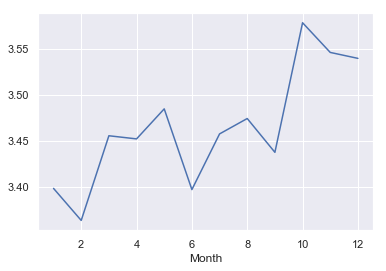

In [68]:
seasonal_df = orders_df.groupby("Month").Quantity.mean()
_ = seasonal_df.plot()


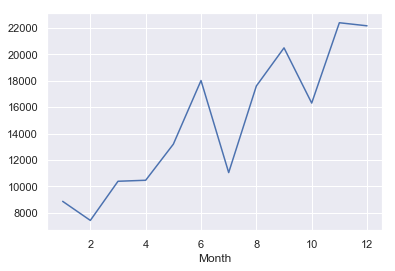

In [69]:
seasonal_df = orders_df.groupby("Month").Quantity.sum()
seasonal_df.plot()

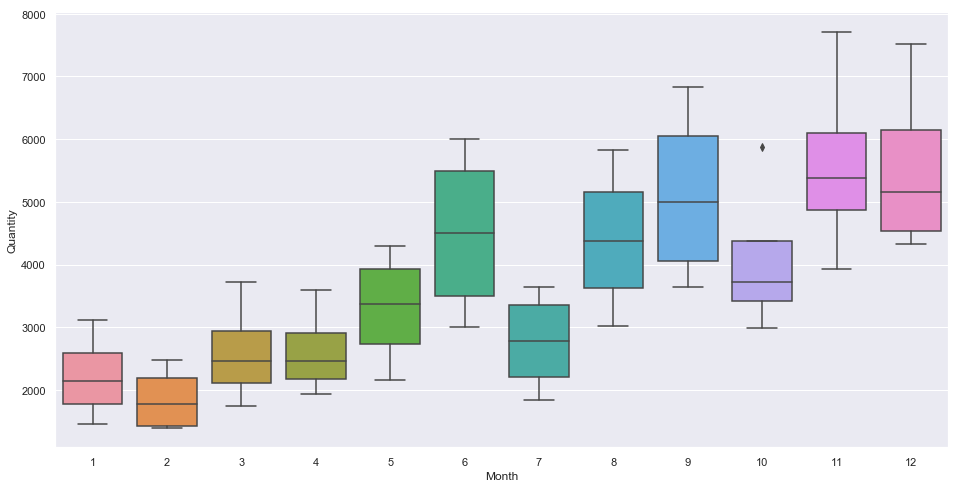

In [74]:
seasonal_df = orders_df.groupby(["Year","Month"]).Quantity.sum().reset_index()

plt.figure(figsize=(16,8))
_ = sns.boxplot(x="Month", y ="Quantity", data = seasonal_df)

<Figure size 1152x1152 with 0 Axes>

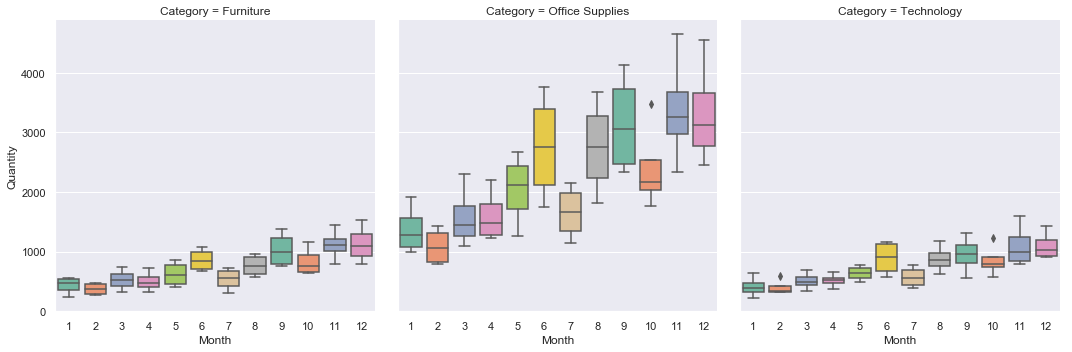

In [87]:
seasonal_df = orders_df.groupby(["Category","Year","Month"]).Quantity.sum().reset_index()

# plt.figure(figsize=(16,16))
_ = sns.catplot(x="Month", y ="Quantity", data = seasonal_df, col="Category", kind="box", palette="Set2" )


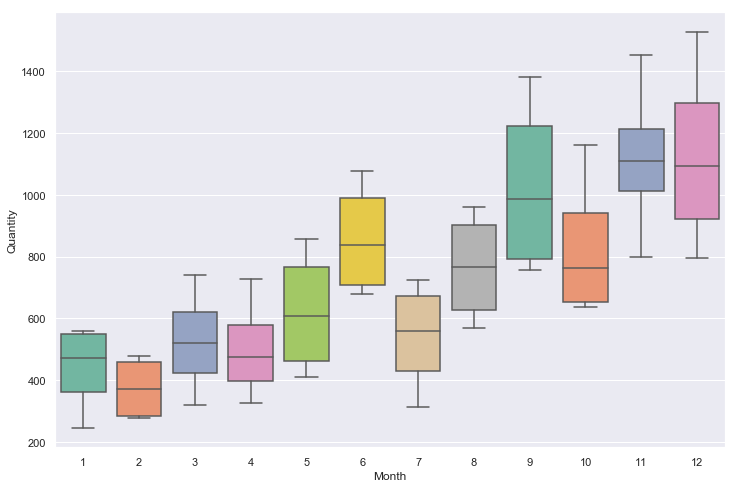

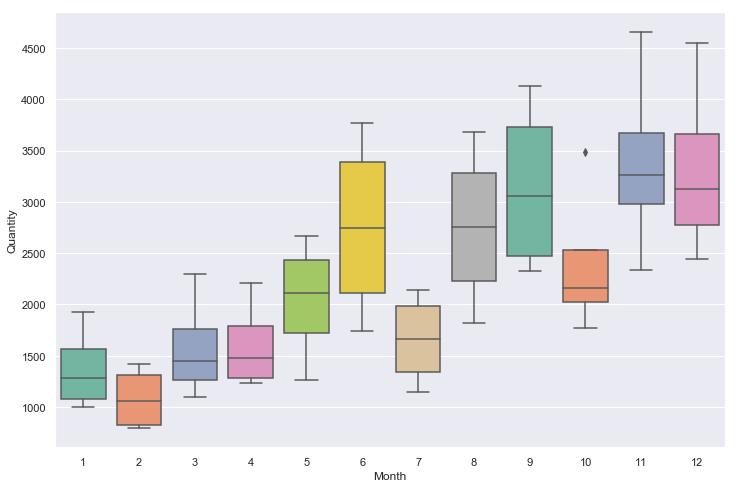

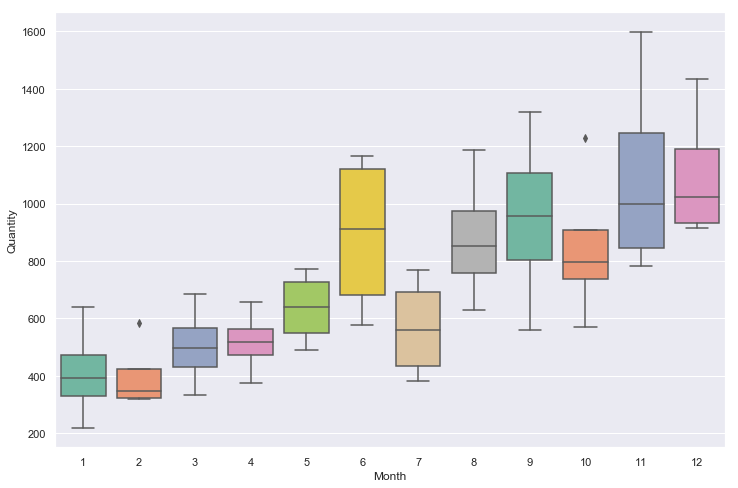

In [101]:
seasonal_df = orders_df.groupby(["Category","Year","Month"]).Quantity.sum().reset_index()
for i in seasonal_df.Category.unique():
#     print(i)
    temp_df =  seasonal_df[seasonal_df.Category == i]   
    plt.figure(figsize=(12,8))
    _ = sns.boxplot(x="Month", y ="Quantity", data = temp_df,  palette="Set2" )
    plt.show()

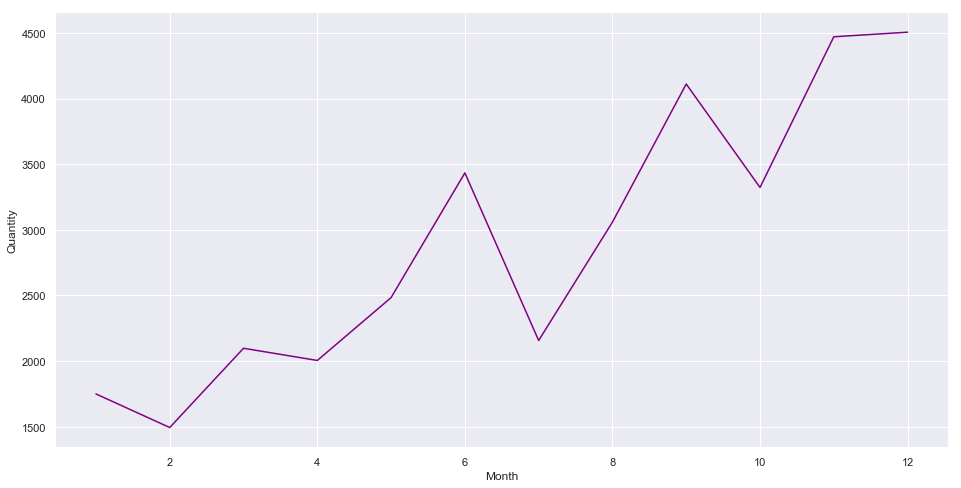

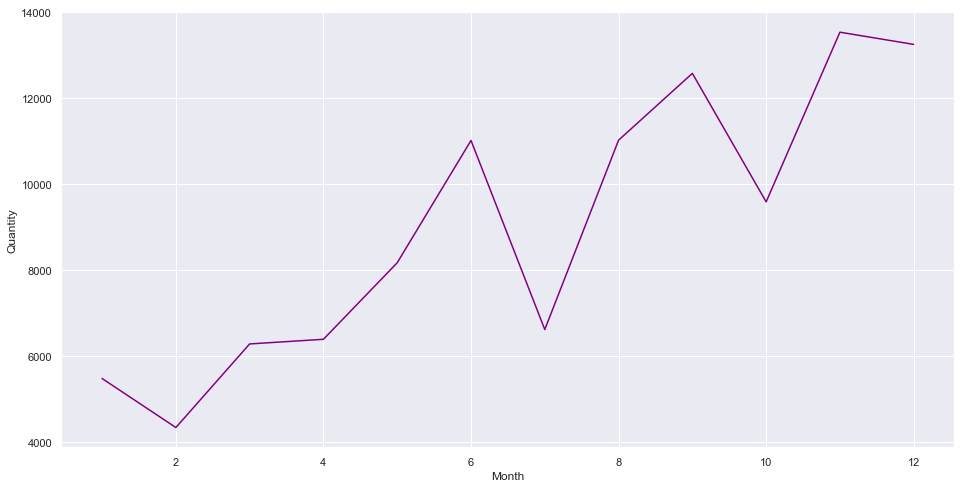

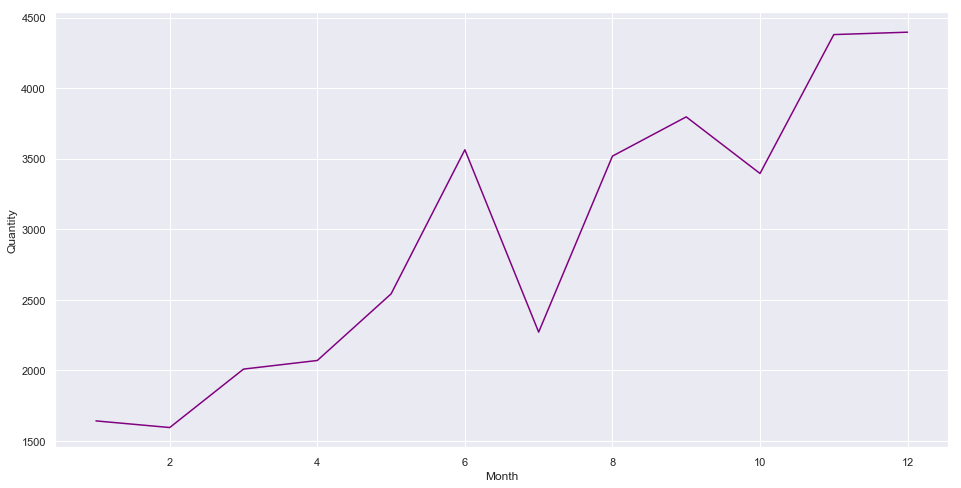

In [103]:
seasonal_df = orders_df.groupby(["Category","Month"]).Quantity.sum().reset_index()
for i in seasonal_df.Category.unique():
#     print(i)
    temp_df =  seasonal_df[seasonal_df.Category == i]   
    plt.figure(figsize=(16,8))
    _ = sns.lineplot(x="Month", y ="Quantity", data = temp_df, color="purple" )

In [109]:
df = pd.merge(orders_df,returns_df, how="left", left_on="Order.ID", right_on="Order ID")

In [115]:
df.Returned.unique()

array([nan, 'Yes'], dtype=object)